In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import platform
from matplotlib import font_manager,rc
if platform.system() == 'Windows':
# 윈도우인 경우 맑은 고딕 폰트 이용
    font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font',family=font_name, size=8)
else:
# Mac 인 경우
    rc('font',family='AppleGothic',size=8)


In [26]:
# pd.read_excel('프로젝트 엑셀 데이터/광주광역시 가구평균 월사용량/가구 평균 월별 전력사용량_2021.01~06.xls')

df_1 = pd.concat([pd.read_excel('프로젝트 엑셀 데이터/광주광역시 가구평균 월사용량/가구 평균 월별 전력사용량_2021.01~06.xls'),
           pd.read_excel('프로젝트 엑셀 데이터/광주광역시 가구평균 월사용량/가구 평균 월별 전력사용량_2021.07~12.xls'),
           pd.read_excel('프로젝트 엑셀 데이터/광주광역시 가구평균 월사용량/가구 평균 월별 전력사용량_2022.01~06.xls'),
           pd.read_excel('프로젝트 엑셀 데이터/광주광역시 가구평균 월사용량/가구 평균 월별 전력사용량_2022.07~12.xls')],
         ignore_index=True)

In [27]:
df_1['대상가구수(호)'].replace(',', '',regex=True, inplace = True)
df_1['대상가구수(호)'] = df_1['대상가구수(호)'].astype('int64')

In [28]:
df_1['전력 사용량(kWh)'] = df_1['대상가구수(호)']*df_1['가구당 평균 전력 사용량(kWh)']

In [29]:
df_1.dtypes

년월                     int64
시도                    object
시군구                   object
대상가구수(호)               int64
가구당 평균 전력 사용량(kWh)     int64
가구당 평균 전기요금(원)        object
전력 사용량(kWh)            int64
dtype: object

In [30]:
df_1['년월'] = df_1['년월'].astype(str)

In [31]:
year = df_1['년월'].apply(lambda x : x[:4])
month = df_1['년월'].apply(lambda x : x[4:])

In [32]:
df_1['년']=year
df_1['월']=month

In [33]:
kwh21_df = df_1.loc[df_1['년']=='2021'][['년', '월','가구당 평균 전력 사용량(kWh)']].groupby('월').mean().reset_index()
kwh22_df = df_1.loc[df_1['년']=='2022'][['년', '월','가구당 평균 전력 사용량(kWh)']].groupby('월').mean().reset_index()

In [34]:
kwh21_df,kwh22_df

(     월  가구당 평균 전력 사용량(kWh)
 0   01               256.6
 1   02               247.8
 2   03               215.4
 3   04               221.6
 4   05               210.0
 5   06               218.4
 6   07               247.8
 7   08               327.2
 8   09               265.4
 9   10               222.8
 10  11               223.0
 11  12               226.8,
      월  가구당 평균 전력 사용량(kWh)
 0   01               246.2
 1   02               245.8
 2   03               218.2
 3   04               222.6
 4   05               203.0
 5   06               211.8
 6   07               267.2
 7   08               316.2
 8   09               271.8
 9   10               215.6
 10  11               212.8
 11  12               223.6)

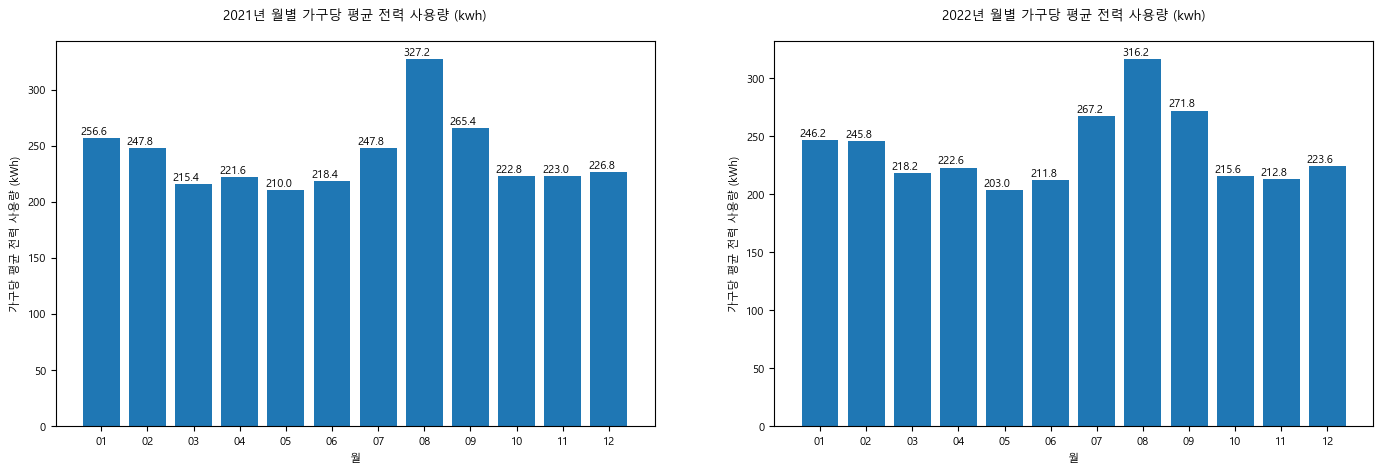

In [35]:
plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
plt.bar(kwh21_df['월'],kwh21_df['가구당 평균 전력 사용량(kWh)'])
plt.title('2021년 월별 가구당 평균 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('가구당 평균 전력 사용량 (kWh)')
for i, v in enumerate(kwh21_df['가구당 평균 전력 사용량(kWh)']):
    plt.text(i-0.45, v + 3, v)

plt.subplot(1,2,2)
plt.bar(kwh22_df['월'],kwh22_df['가구당 평균 전력 사용량(kWh)'])
plt.title('2022년 월별 가구당 평균 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('가구당 평균 전력 사용량 (kWh)')
for i, v in enumerate(kwh22_df['가구당 평균 전력 사용량(kWh)']):
    plt.text(i-0.45, v + 3, v)
plt.show()

In [36]:
df_2 = pd.concat([pd.read_excel('프로젝트 엑셀 데이터/광주광역시 용도별 월사용량/계약종별 전력사용량 월별_2021.01~06.xls'),
           pd.read_excel('프로젝트 엑셀 데이터/광주광역시 용도별 월사용량/계약종별 전력사용량 월별_2021.07~12.xls'),
           pd.read_excel('프로젝트 엑셀 데이터/광주광역시 용도별 월사용량/계약종별 전력사용량 월별_2022.01~06.xls'),
           pd.read_excel('프로젝트 엑셀 데이터/광주광역시 용도별 월사용량/계약종별 전력사용량 월별_2022.07~12.xls')],
         ignore_index=True)

In [37]:
df_2

,년월,시구,시군구,계약구분,고객호수(호),사용량(kWh),전기요금(원),평균판매단가(원/kWh)
0,202101,광주광역시,광산구,가로등,"12,803","2,629,917","281,124,107",106.9
1,202101,광주광역시,광산구,교육용,169,"6,657,102","648,491,335",97.4
2,202101,광주광역시,광산구,농사용,"6,137","6,512,071","284,478,647",43.7
3,202101,광주광역시,광산구,산업용,"3,205","173,642,738","21,163,162,804",121.9
4,202101,광주광역시,광산구,심 야,"1,315","3,104,941","215,570,260",69.4
...,...,...,...,...,...,...,...,...
955,202212,광주광역시,서구,산업용,684,"26,773,505","4,076,579,360",152.3
956,202212,광주광역시,서구,심 야,699,"1,273,849","122,462,022",96.1
957,202212,광주광역시,서구,일반용,"20,502","63,473,543","10,215,853,633",160.9
958,202212,광주광역시,서구,주택용,"76,911","35,741,374","4,461,869,338",124.8


In [38]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   년월             960 non-null    int64  
 1   시구             960 non-null    object 
 2   시군구            960 non-null    object 
 3   계약구분           960 non-null    object 
 4   고객호수(호)        960 non-null    object 
 5   사용량(kWh)       960 non-null    object 
 6   전기요금(원)        960 non-null    object 
 7   평균판매단가(원/kWh)  960 non-null    float64
dtypes: float64(1), int64(1), object(6)
memory usage: 60.1+ KB


In [39]:
df_2['고객호수(호)'].replace(',', '',regex=True, inplace = True)
df_2['고객호수(호)'] = df_2['고객호수(호)'].astype('int64')
df_2['사용량(kWh)'].replace(',', '',regex=True, inplace = True)
df_2['사용량(kWh)'] = df_2['사용량(kWh)'].astype('int64')

In [40]:
df_2['고객당 평균 전력 사용량(kWh)'] = np.round(df_2['사용량(kWh)']/df_2['고객호수(호)'],1)

In [41]:
df_2

,년월,시구,시군구,계약구분,고객호수(호),사용량(kWh),전기요금(원),평균판매단가(원/kWh),고객당 평균 전력 사용량(kWh)
0,202101,광주광역시,광산구,가로등,12803,2629917,"281,124,107",106.9,205.4
1,202101,광주광역시,광산구,교육용,169,6657102,"648,491,335",97.4,39391.1
2,202101,광주광역시,광산구,농사용,6137,6512071,"284,478,647",43.7,1061.1
3,202101,광주광역시,광산구,산업용,3205,173642738,"21,163,162,804",121.9,54178.7
4,202101,광주광역시,광산구,심 야,1315,3104941,"215,570,260",69.4,2361.2
...,...,...,...,...,...,...,...,...,...
955,202212,광주광역시,서구,산업용,684,26773505,"4,076,579,360",152.3,39142.6
956,202212,광주광역시,서구,심 야,699,1273849,"122,462,022",96.1,1822.4
957,202212,광주광역시,서구,일반용,20502,63473543,"10,215,853,633",160.9,3096.0
958,202212,광주광역시,서구,주택용,76911,35741374,"4,461,869,338",124.8,464.7


In [42]:
df_2['년월'] = df_2['년월'].astype(str)

In [43]:
year = df_2['년월'].apply(lambda x : x[:4])
month = df_2['년월'].apply(lambda x : x[4:])

In [44]:
df_2['년']=year
df_2['월']=month

In [45]:
kwh21_df2 = df_2.loc[df_2['년']=='2021'][['년','월','계약구분','고객당 평균 전력 사용량(kWh)']].pivot_table(index=['월'], columns='계약구분', values = '고객당 평균 전력 사용량(kWh)')
kwh21_df2 = kwh21_df2[['가로등', '교육용', '농사용', '산업용', '심 야', '일반용', '주택용']]
kwh22_df2 = df_2.loc[df_2['년']=='2022'][['년','월','계약구분','고객당 평균 전력 사용량(kWh)']].pivot_table(index=['월'], columns='계약구분', values = '고객당 평균 전력 사용량(kWh)')
kwh22_df2 = kwh22_df2[['가로등', '교육용', '농사용', '산업용', '심 야', '일반용', '주택용']]

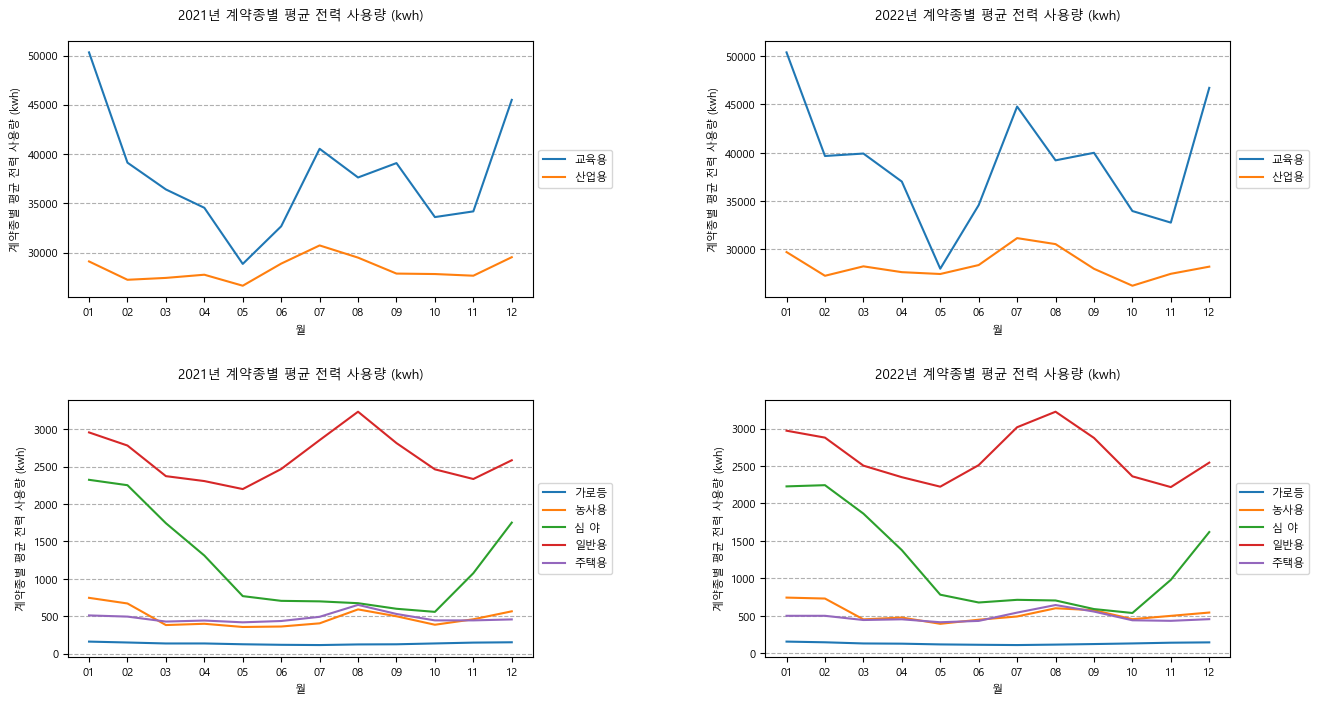

In [46]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.subplots_adjust(wspace=0.5, hspace=0.4)
plt.plot(kwh21_df2[['교육용','산업용']])
plt.title('2021년 계약종별 평균 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('계약종별 평균 전력 사용량 (kwh)')
plt.legend(kwh21_df2[['교육용','산업용']].columns,loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(axis='y', linestyle='--', alpha=1)

plt.subplot(2,2,2)
plt.plot(kwh22_df2[['교육용','산업용']])
plt.title('2022년 계약종별 평균 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('계약종별 평균 전력 사용량 (kwh)')
plt.legend(kwh22_df2[['교육용','산업용']].columns,loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(axis='y', linestyle='--', alpha=1)

plt.subplot(2,2,3)
plt.subplots_adjust(wspace=0.5)
plt.plot(kwh21_df2[['가로등', '농사용', '심 야', '일반용', '주택용']])
plt.title('2021년 계약종별 평균 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('계약종별 평균 전력 사용량 (kwh)')
plt.legend(kwh21_df2[['가로등', '농사용', '심 야', '일반용', '주택용']].columns,loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(axis='y', linestyle='--', alpha=1)

plt.subplot(2,2,4)
plt.subplots_adjust(wspace=0.5)
plt.plot(kwh22_df2[['가로등', '농사용', '심 야', '일반용', '주택용']])
plt.title('2022년 계약종별 평균 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('계약종별 평균 전력 사용량 (kwh)')
plt.legend(kwh22_df2[['가로등', '농사용', '심 야', '일반용', '주택용']].columns,loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(axis='y', linestyle='--', alpha=1)